<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/NLP/NLP_%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## corpus
- 말뭉치
- 가지고 있는 텍스트 데이터
- ex) 3개의 문장

## Word Embedding
- dense하게 차원축소
- 엄청난 양의 corpus로 학습되어 각 단어에 대한 정보를 꽤나 정확하고 깊게 담아냄
1. GloVe
2. word2vec


## GloVe
- co-occurrence matrix
- 한 단어와 근처 단어가 몇 번 "같이" 나오는지 세보는 것
- 차원축소 알고리즘 중 하나인 SVD를 사용하여 300 X 40,000 의 행열로 압축

## word2vec
- skipgram 성능이 좋음
- 예측을 위한 분류모델 : neural network로 구현되고 SGD로 학습
- vector의 방향성에 encoding 됨
1. skipgram : 타깃단어를 이용하여 주변단어들을 예측
2. CBOW : 주변단어들을 이용하여 타깃단어를 예측

# 기본개념
- 세상에 존재하는 어떤 미지의 확률분포함수를 모사(approximate)
- 주어진 입력(x)에 대해서 원하는 출력(y)을 반환하도록, 손실함수를 최소화하는 파라미터를 찾는 것
      1. Gradient descent를 수행하기 위해 back-propagation을 수행
      2. MLE(Maximum Likelihood Estimation)
- Autoencoders(인코더와 디코더를 통해 압축과 해제를 실행)가 Non-linear dimension reduction을 수행 : 데이터를 효과적으로 압축
      [Autoencoders]
      1. 손실압축(쓸데없는 정보는 버리고 중요한 정보들을 보존) 수행
      2. 특징(feature)을 추출하는 방법을 자동으로 학습
- 낮은 차원으로의 표현을 통해 차원의 저주를 벗어나 효과적인 학습이 가능  
      **데이터 학습을 위해 차원이 증가하면서 학습데이터 수가 차원의 수보다 적어져 성능이 저하되는 현상
      


## Text Classification
1. RNN
2. CNN

## Sequence-to-Sequence with Attention
- text to numeric을 넘어서 numeric to text를 가능하게 함


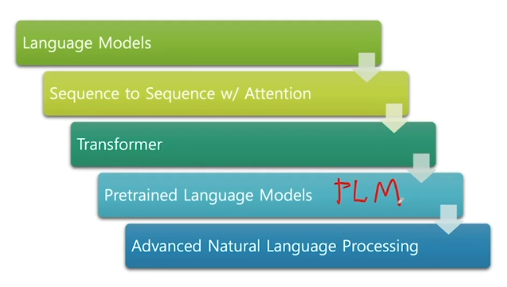

## LM (Language Model)
- 문장 자체의 출현 확률을 예측하거나, 이전 단어들이 주어졌을 때 다음 단어를 예측하기 위한 모델
- 단어와 단어 사이의 출현빈도를 세어 확률을 계산 -> 언어의 문장분포(Ground Truth)에 근사하게 모델링하는 것
- Markov assumption(앞에 k개만 보기) 도입 : 보통 tri-gram(k=2)을 가장 많이 사용
- Markov assumption을 통해서도 여전히 확률 값이 0이 될 수 있으므로 Smoothing 또는 Discounting을 통해 현상을 완화


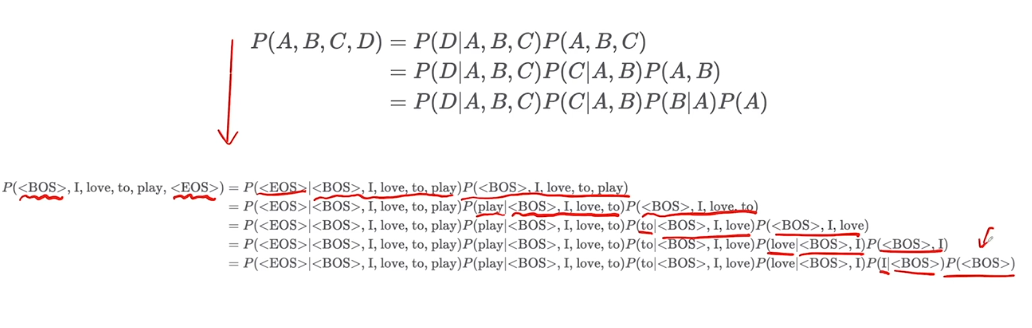

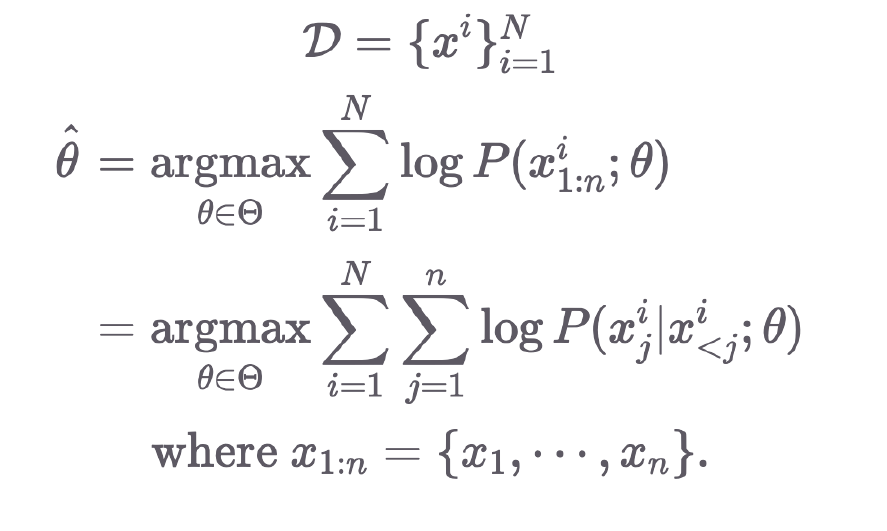